In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from netCDF4 import Dataset, num2date
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [2]:
f = Dataset('air.sig995.1950.nc')
air = f.variables['air']
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]
time = f.variables['time']

In [3]:
lon, lat = np.meshgrid(lon, lat)

In [4]:
m = Basemap(llcrnrlon=0,llcrnrlat=-90,urcrnrlon=360,urcrnrlat=90,projection='mill')
x, y = m(lon, lat)

/Users/koldunov/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


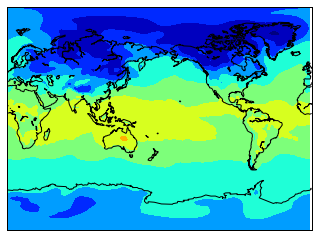

In [5]:
m.drawcoastlines()
m.contourf(x,y,air[0,:,:],levels=np.linspace(230,350,10), extend="both");

Make the figure bigger

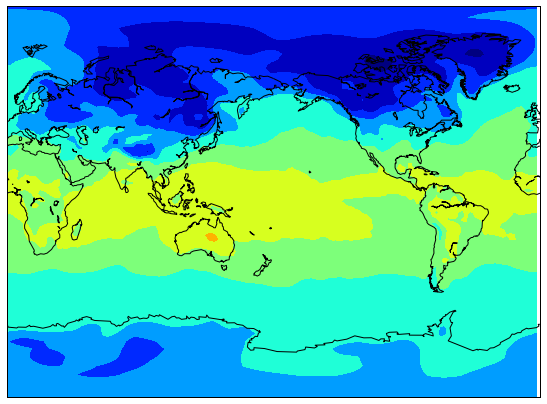

In [6]:
plt.figure(figsize=(10,7))
m.drawcoastlines()
m.contourf(x,y,air[0,:,:],levels=np.linspace(230,350,10), extend="both");

<matplotlib.colorbar.Colorbar instance at 0x10c027908>

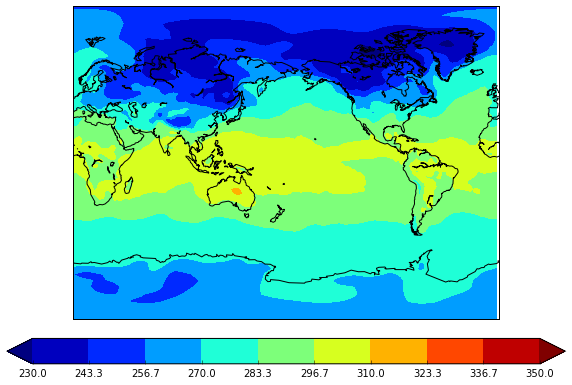

In [7]:
plt.figure(figsize=(10,7))
m.drawcoastlines()
m.contourf(x,y,air[0,:,:],levels=np.linspace(230,350,10), extend="both");
plt.colorbar( orientation='horizontal', pad=0.05)

##Links

 - [Basemap documentation](http://matplotlib.org/basemap/index.html)
 - [Basemap projections](http://matplotlib.org/basemap/users/mapsetup.html)

##Exersise

 - put timestamp (date) of the data as a title (plt.title())

<matplotlib.colorbar.Colorbar instance at 0x10d311b48>

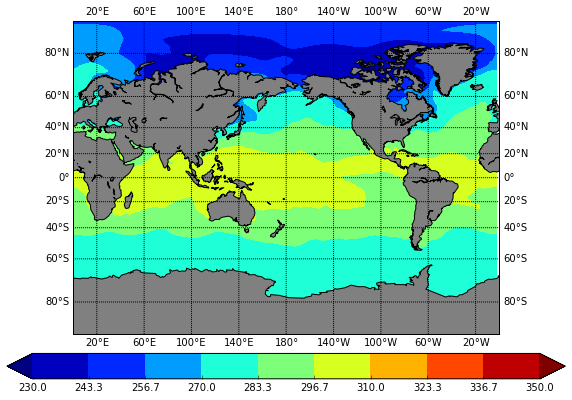

In [8]:
plt.figure(figsize=(10,7))
m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.), labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,40.), labels=[False,False,True,True])
m.drawmapboundary(fill_color='white')
m.contourf(x,y,air[0,:,:],levels=np.linspace(230,350,10), extend="both");
plt.colorbar( orientation='horizontal', pad=0.05)

In [9]:
m = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
x, y = m(lon, lat)

In [ ]:
fig = plt.figure(figsize=(15,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air[0,:,:],20)
plt.title('Monthly mean SAT')

In [ ]:
m = Basemap(llcrnrlon=-10,llcrnrlat=25,urcrnrlon=95,urcrnrlat=75,projection='mill', resolution='l')
x, y = m(lon, lat)

In [ ]:
plt.figure(figsize=(10,7))
m.drawcoastlines()
m.contourf(x,y,air[0,:,:],levels=np.linspace(230,350,10), extend="both");
plt.colorbar( orientation='horizontal', pad=0.05)

Regional plot

In [ ]:
m = Basemap(width=5000000,height=3000000,
            resolution='l',projection='stere',\
            lat_ts=60,lat_0=50,lon_0=20)
x, y = m(lon, lat)

In [ ]:
plt.figure(figsize=(10,7))
m.drawcoastlines()
m.contourf(x,y,air[0,:,:],levels=np.linspace(230,350,30), extend="both");
plt.colorbar( orientation='horizontal', pad=0.05)

We have to add cyclic point

In [ ]:
from mpl_toolkits.basemap import addcyclic

It's only works with 1D lon data, so we have to load them again

In [ ]:
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]

We add cyclic point to lons and also to our data

In [ ]:
air_cycl, lons = addcyclic(air[:,:,:], lon)

In [ ]:
air_cycl.shape

In [ ]:
lon2, lat2 = np.meshgrid(lons, lat)

In [ ]:
lat2.shape

In [ ]:
m = Basemap(width=5000000,height=3000000,
            resolution='l',projection='stere',\
            lat_ts=60,lat_0=50,lon_0=20)
x, y = m(lon2, lat2)

In [ ]:
plt.figure(figsize=(10,7))
m.drawcoastlines()
m.contourf(x,y,air_cycl[0,:,:],levels=np.linspace(230,350,40), extend="both");
plt.colorbar( orientation='horizontal', pad=0.05)

##Exersise

Plot ETOPO5 data

- import nessesary modules
- open netCDF file etopo5.nc
- copy variables from this file
- look at the data using imshow
- flip data upsidedown and look at it (use np.flipud)
- Create subset of data, that covers only north Atlantic
<img src="files/nAtl.png">


- create 2D versions of lon and lat (use np.meshgrid)
- create basmeap map of this subset (you can use Miller Cylindrical Projection (projection='mill'))
<img src="files/nAtl2.png">

- plot only ocean (or land), change color scale
<img src="files/nAtl3.png">

- zoom to the northern part of Mid-Atlantic Ridge and make choose good color map to make its structures visible
<img src="files/nAtl4.png">

- zoom closer and find the most craziest color map
<img src="files/nAtl5.png">